In [4]:
import numpy as np
import numpy.linalg as nl
import sympy as sy
import matplotlib.pyplot as plt

    

In [10]:
def A(n,m):
    row=np.array([[(-1)**j for j in range(m+1)]])
    A=row
    for i in range(1,n+1):
        xi=-1+2*i/n
        row=np.array([[xi**j for j in range(m+1)]])
        A=np.vstack((A,row))
    return A
def x_i(n):
    A=np.array([-1+2*i/n for i in range(n+1)])
    return A
def y_i(n):
    A=np.reshape(np.array(1/(1+25*(x_i(n))**2)),(n+1,1))
    return A 
def y(n):
    A=[1/(1+25*i**2) for i in range(n+1)]
    return A

In [ ]:
def least_squre(A,n,m):
    U,D,VT=nl.svd(A)
    diag_D=np.diag(D)
    if n==m:
        return np.transpose(VT)@nl.inv(diag_D)@np.transpose(U)@y_i(n)
    elif n>m:
        zero_matrix=np.zeros((m+1,n-m))
        sigma=np.hstack((np.linalg.inv(diag_D),zero_matrix))
        return np.transpose(VT)@sigma@np.transpose(U)@y_i(n)
least_squre(A(10,10),10,10)
least_squre(A(80,20),80,20)

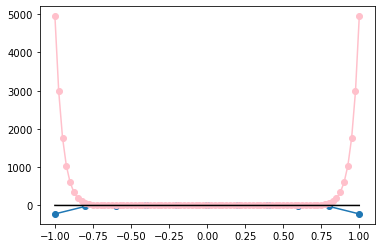

In [32]:
y_value=[]
x=11
for j in range(x):
    for i in range(x):
        P_x_j=least_squre(A(x-1,x-1),x-1,x-1)[i][0]*(x_i(x-1)[j]**i)
    y_value.append(P_x_j)
plt.plot(x_i(x-1),y_value,marker='o')
y_value_1=[]
for j in range(81):
    for i in range(21):
        P_x_j_1=least_squre(A(80,20),80,20)[i][0]*(x_i(80)[j]**i)
    y_value_1.append(P_x_j_1)
plt.plot(x_i(80),y_value_1,marker='o',color='pink')
plt.plot(x_i(100),y(100),color="black")
